In [2]:
import matplotlib.pyplot as plt
import numpy as np

import ambulance_game as abg

# Simulation

In [3]:
lambda_2 = 0.5
lambda_1 = 1
mu = 0.6
num_of_servers = 3
threshold = 2
system_capacity = 4
buffer_capacity = 2

In [4]:
simulation = abg.simulation.simulate_model(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
    runtime=10000,
)
simulation_records = simulation.get_all_records()
waiting_times = [r.waiting_time for r in simulation_records if r.node==2]
blocking_times = [r.time_blocked for r in simulation_records if r.node==1]
service_times = [r.service_time for r in simulation_records if r.node==2]

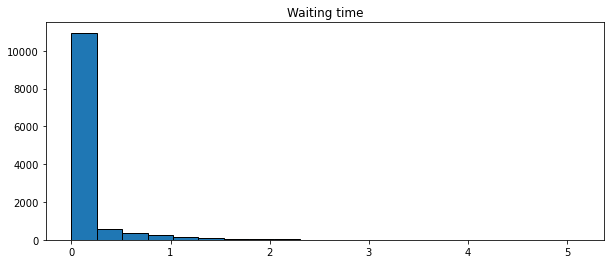

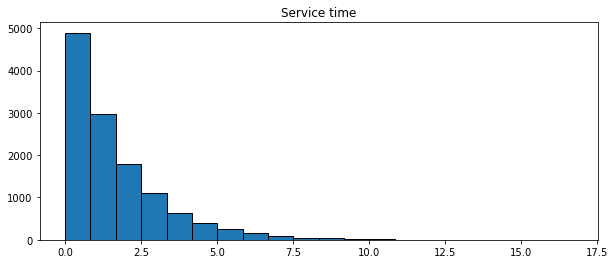

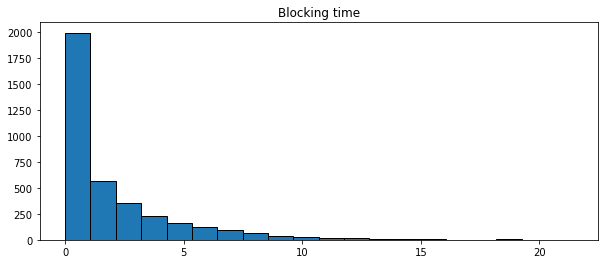

In [5]:
plt.figure(figsize=(10, 4))
plt.hist(waiting_times, bins=20, ec="black")
plt.title("Waiting time")
plt.figure(figsize=(10, 4))
plt.hist(service_times, bins=20, ec="black")
plt.title("Service time")
plt.figure(figsize=(10, 4))
plt.hist(blocking_times, bins=20, ec="black")
plt.title("Blocking time");

# Markov Chain

In [6]:
lambda_2 = 0.5
lambda_1 = 1
mu = 0.6

num_of_servers = 3
threshold = 2
system_capacity = 4
buffer_capacity = 2

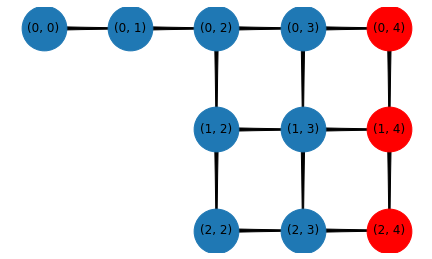

In [7]:
abg.markov.visualise_markov_chain(
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
);

In [8]:
Q = abg.markov.get_transition_matrix(
    lambda_2=lambda_2, 
    lambda_1=lambda_1, 
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

In [10]:
Q

array([[-1.5,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.6, -2.1,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1.2, -2.7,  0.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.2, -2.7,  0.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.2, -2.2,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.8,  0. ,  0. , -3.3,  0.5,  0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.8,  0. ,  0. , -3.3,  0.5,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -2.8,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -2.3,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -2.3,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -1.8]])

In [11]:
pi = abg.markov.get_steady_state_numerically(Q)
pi

array([0.06215563, 0.15538908, 0.19423635, 0.12705875, 0.09843256,
       0.07715779, 0.07101188, 0.08501237, 0.03354687, 0.03816753,
       0.05783119])

## Waiting time

In [12]:
np.mean(waiting_times)

0.10655214558118825

In [13]:
abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

0.1036516892748227

## Blocking time

In [14]:
np.mean(blocking_times)

1.9550148075506093

In [15]:
abg.markov.get_mean_blocking_time_using_markov_state_probabilities(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

1.8947351481157693

## Mean proportion within target

In [16]:
abg.markov.proportion_within_target_using_markov_state_probabilities(
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
    class_type=None,
    target=4,
)

0.90088893090739

# Hospital strategies

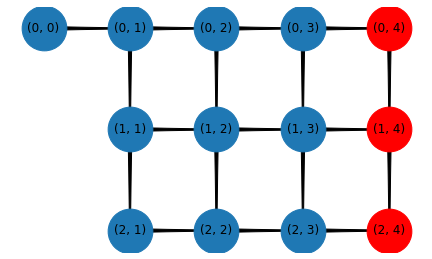

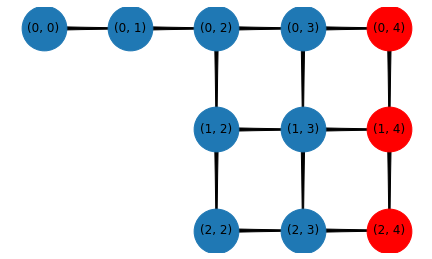

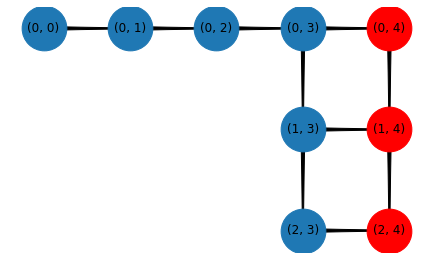

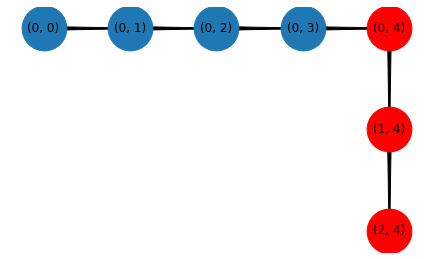

In [17]:
for t in range(1, system_capacity + 1):
    abg.markov.visualise_markov_chain(
        num_of_servers=num_of_servers,
        threshold=t,
        system_capacity=system_capacity,
        buffer_capacity=buffer_capacity,
    );

# Playing the game

In [18]:
lambda_2 = 4

lambda_1_1 = 1
mu_1 = 1
num_of_servers_1 = 3
system_capacity_1 = 6
buffer_capacity_1 = 3

lambda_1_2 = 1
mu_2 = 1
num_of_servers_2 = 4
system_capacity_2 = 6
buffer_capacity_2 = 3

target = 3.5

In [19]:
my_game = abg.game.build_game_using_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
)

In [21]:
my_game

Bi matrix game with payoff matrices:

Row player:
[[-3.11423934e-04 -3.11423934e-04 -3.11423934e-04 -3.11423934e-04
  -3.11423934e-04 -3.11423934e-04]
 [-2.69894872e-04 -2.73182570e-04 -2.85947898e-04 -2.97555312e-04
  -3.01184471e-04 -3.11423934e-04]
 [-1.46439233e-04 -1.53205743e-04 -1.78591460e-04 -2.10920651e-04
  -2.24187402e-04 -2.53689484e-04]
 [-1.01362094e-05 -3.32490715e-06 -5.21349959e-06 -4.21880740e-05
  -6.63862751e-05 -1.25443095e-04]
 [-5.15578125e-04 -4.07632907e-04 -1.59012915e-04 -2.29646124e-05
  -2.17750505e-06 -1.74482652e-05]
 [-1.82369312e-03 -1.60234271e-03 -9.28358609e-04 -3.93590193e-04
  -2.07360168e-04 -3.65210893e-05]]

Column player:
[[-3.82530431e-04 -3.77077498e-04 -3.57699700e-04 -2.93084263e-04
  -9.05481242e-05 -8.00437095e-06]
 [-3.82530431e-04 -3.77409795e-04 -3.58559231e-04 -2.95668585e-04
  -9.74506679e-05 -8.00437095e-06]
 [-3.82530431e-04 -3.78607983e-04 -3.61175712e-04 -3.04346347e-04
  -1.25391190e-04 -2.58915422e-05]
 [-3.82530431e-04 -3.788

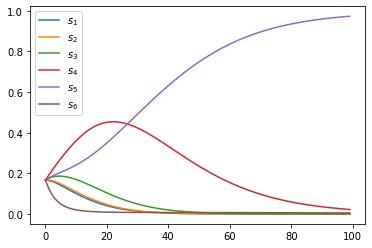

In [22]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 50000, 100))
plt.plot(xs)
plt.legend([f"$s_{i + 1}$" for i in range(len(xs[0]))]);

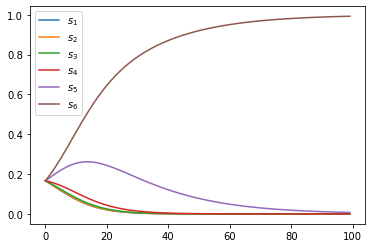

In [23]:
plt.plot(ys)
plt.legend([f"$s_{i + 1}$" for i in range(len(ys[0]))]);